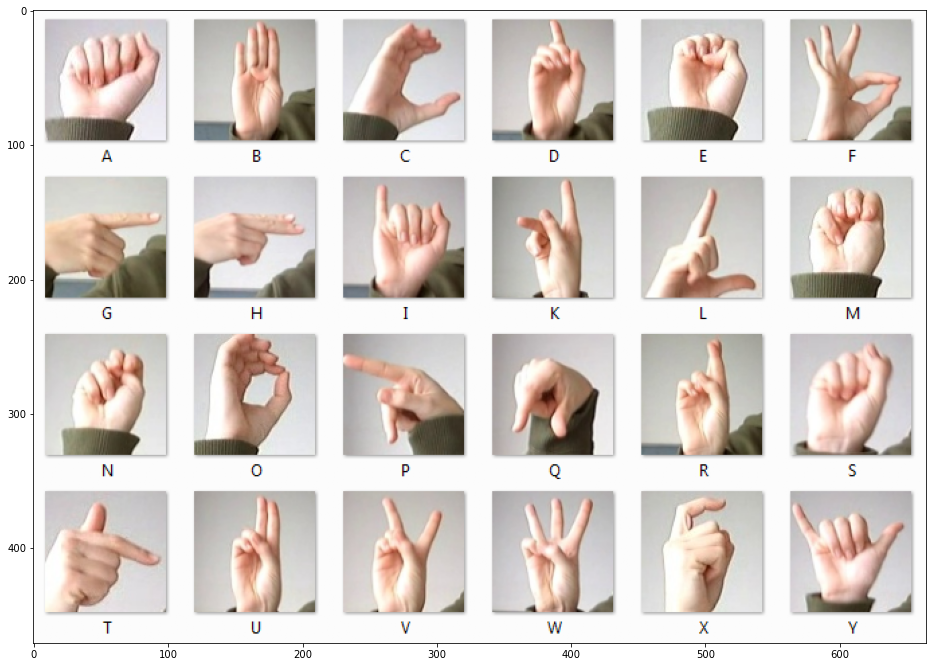

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
img = plt.imread(r"C:\Users\lenovo\Downloads\archive (7)\amer_sign2.png")
plt.imshow(img)
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [3]:
# Load data
train_data = pd.read_csv(r"C:\Users\lenovo\Downloads\archive (7)\sign_mnist_train\sign_mnist_train.csv")
test_data = pd.read_csv(r"C:\Users\lenovo\Downloads\archive (7)\sign_mnist_test\sign_mnist_test.csv")


In [4]:
display(train_data.shape)
display(test_data.shape)

(27455, 785)

(7172, 785)

In [5]:
# Checking the first row
display(train_data.head(0))

# Checking the first few rows
display(train_data.head())

# Summary of the train dataset
display(train_data.describe())

# Checking for null values
display(train_data.isnull().sum())


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [6]:
# Checking the first row
display(test_data.head(0))

# Checking the first few rows
display(test_data.head())

# Summary of the train dataset
display(test_data.describe())

# Checking for null values
display(test_data.isnull().sum())


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [8]:
# Splitting data into labels and images
train_labels = train_data['label'].values
train_images = train_data.drop('label', axis=1).values
test_labels = test_data['label'].values
test_images = test_data.drop('label', axis=1).values

In [9]:
# Normalize images
train_images = train_images / 255
test_images = test_images / 255

In [10]:
# Reshape images
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [11]:
# Convert labels to categorical (one-hot encoded)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
# Note: The Sign Language MNIST dataset doesn't have a gesture for 'J' (9) or 'Z' (25) as they involve motion.
label_to_letter = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U',
    21: 'V', 22: 'W', 23: 'X', 24: 'Y'
}


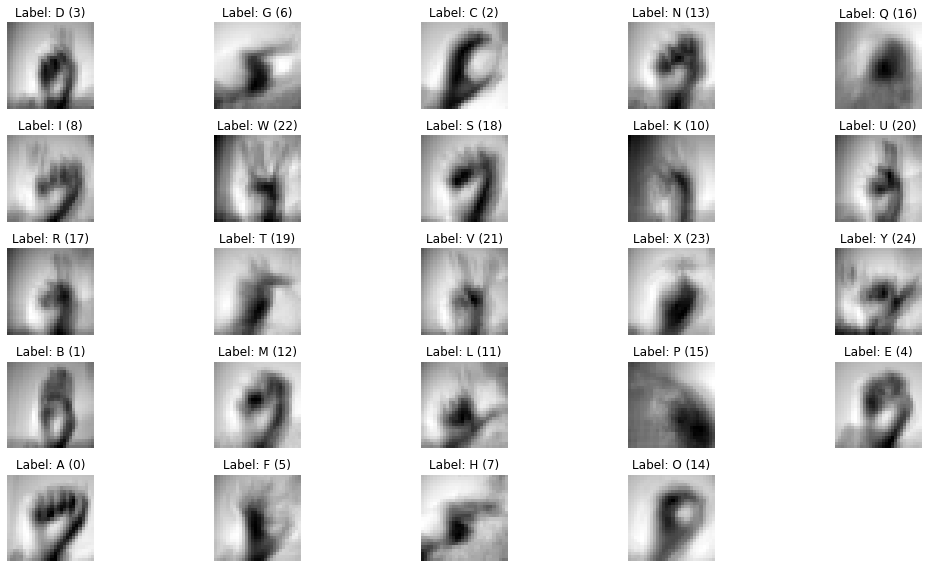

In [13]:
import math
import matplotlib.pyplot as plt

def plot_mean_images(data):
    unique_labels = data['label'].unique()
    n = len(unique_labels)
    
    # Calculate the number of rows and columns for subplots
    n_cols = 5
    n_rows = math.ceil(n / n_cols)

    plt.figure(figsize=(15, 8))

    for i, label in enumerate(unique_labels):
        plt.subplot(n_rows, n_cols, i+1)
        mean_img = data[data['label'] == label].iloc[:, 1:].mean(axis=0).values.reshape(28, 28)
        plt.imshow(mean_img, cmap='gray')
        
        # Use the label_to_letter dictionary to get the corresponding letter for the label
        letter = label_to_letter.get(label, f"Unknown: {label}")  # Default to "Unknown" if label isn't in the dictionary
        plt.title(f"Label: {letter} ({label})")  # Display both the letter and the numeric label
        
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_mean_images(train_data)


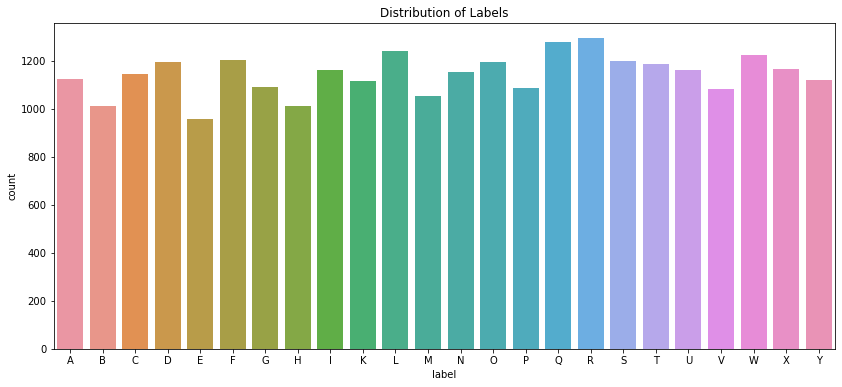

In [14]:
import seaborn as sns

def plot_label_distribution(data):
    plt.figure(figsize=(14, 6))
    sns.countplot(data=data, x='label').set_title('Distribution of Labels')
    plt.xticks(ticks=range(len(label_to_letter)), labels=[label_to_letter[l] for l in sorted(label_to_letter.keys())])
    plt.show()

plot_label_distribution(train_data)


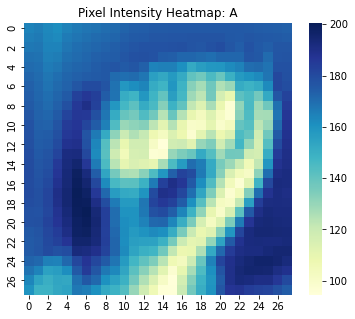

In [15]:
def plot_pixel_heatmap(data, label):
    subset_data = data[data['label'] == label]
    mean_img = subset_data.iloc[:, 1:].mean(axis=0).values.reshape(28, 28)

    plt.figure(figsize=(6, 5))
    sns.heatmap(mean_img, cmap='YlGnBu')
    letter = label_to_letter.get(label, f"Unknown: {label}")
    plt.title(f"Pixel Intensity Heatmap: {letter}")
    plt.show()

# Let's visualize the heatmap for the label corresponding to letter 'A'
plot_pixel_heatmap(train_data, 0)


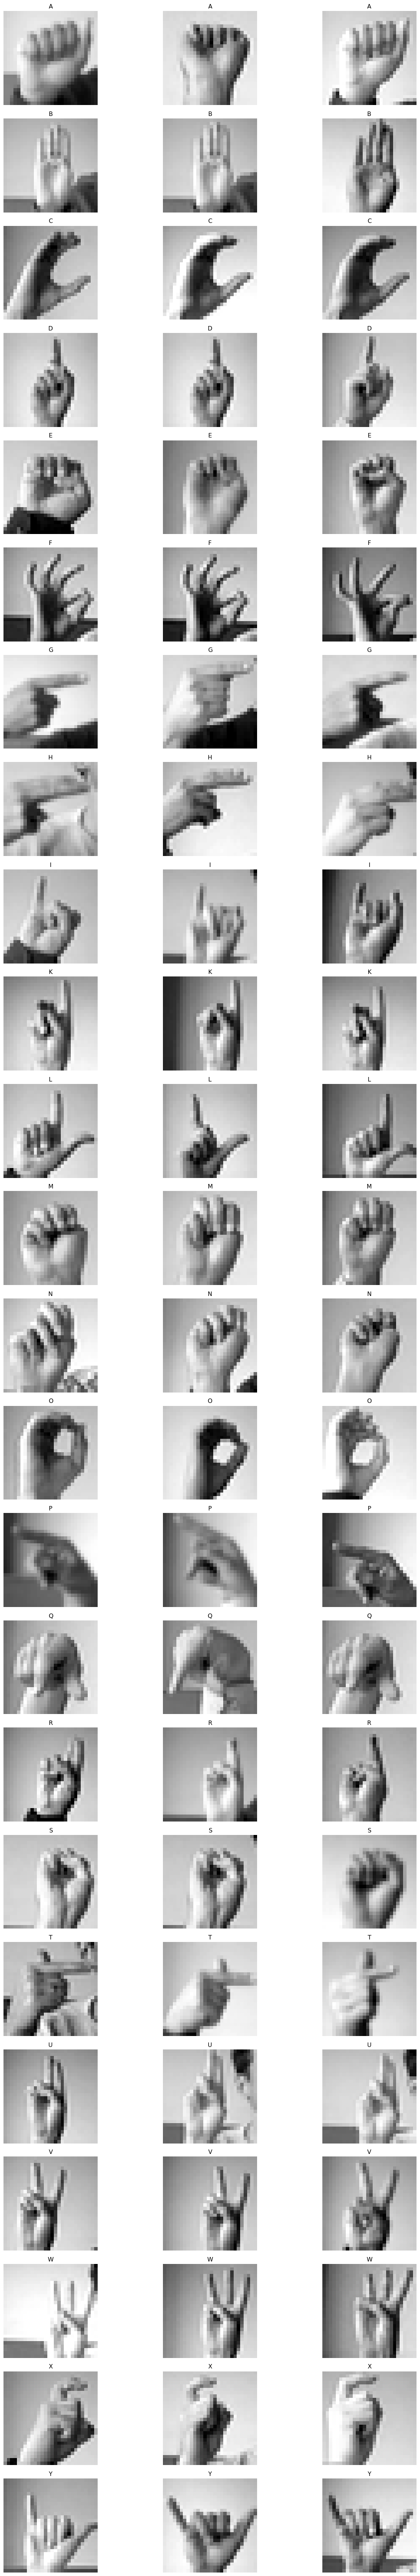

In [16]:
import numpy as np

def display_random_images(data, num_samples=1):
    plt.figure(figsize=(15, num_samples * len(label_to_letter)))

    for idx, label in enumerate(sorted(label_to_letter.keys())):
        for i in range(num_samples):
            random_image = data[data['label'] == label].sample().iloc[:, 1:].values.reshape(28, 28)
            plt.subplot(len(label_to_letter), num_samples, idx * num_samples + i + 1)
            plt.imshow(random_image, cmap='gray')
            plt.title(label_to_letter[label])
            plt.axis('off')

    plt.tight_layout()
    plt.show()

display_random_images(train_data, num_samples=3)


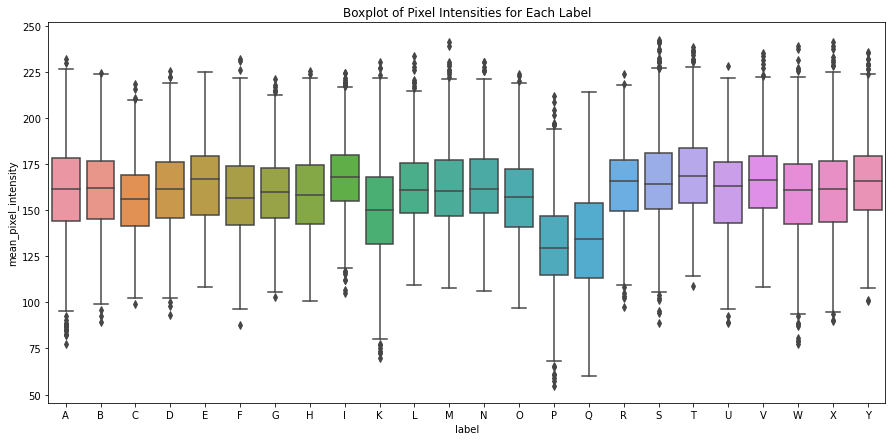

In [17]:
def plot_pixel_intensity_boxplots(data):
    data['mean_pixel_intensity'] = data.iloc[:, 1:].mean(axis=1)
    plt.figure(figsize=(15, 7))
    sns.boxplot(x='label', y='mean_pixel_intensity', data=data)
    plt.xticks(ticks=range(len(label_to_letter)), labels=[label_to_letter[l] for l in sorted(label_to_letter.keys())])
    plt.title('Boxplot of Pixel Intensities for Each Label')
    plt.show()

plot_pixel_intensity_boxplots(train_data)


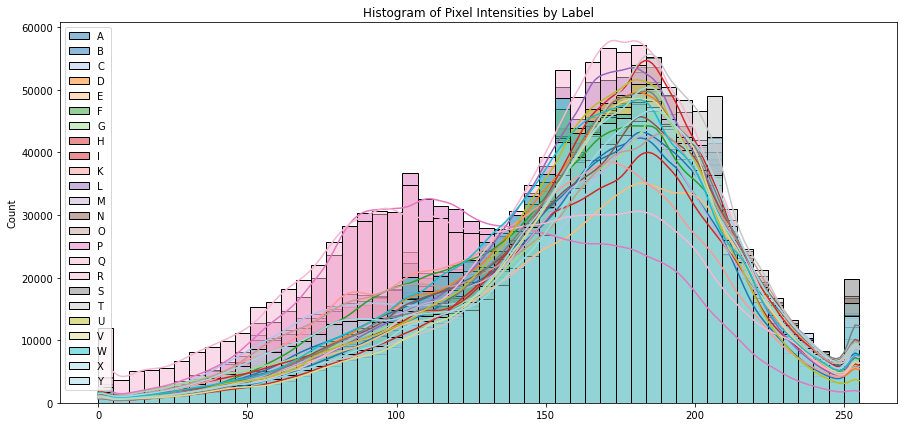

In [18]:
def plot_pixel_intensity_histogram(data):
    plt.figure(figsize=(15, 7))
    
    # Get a colormap and create a list of colors based on the number of unique labels
    colormap = plt.cm.get_cmap('tab20', len(label_to_letter))
    colors = [colormap(i) for i in range(len(label_to_letter))]
    
    for idx, label in enumerate(sorted(label_to_letter.keys())):
        subset = data[data['label'] == label]
        sns.histplot(subset.iloc[:, 1:].values.ravel(), label=label_to_letter[label], kde=True, bins=50, alpha=0.5, color=colors[idx])
        
    plt.title('Histogram of Pixel Intensities by Label')
    plt.legend()
    plt.show()

plot_pixel_intensity_histogram(train_data)

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [20]:
from keras.utils import to_categorical

train_labels = to_categorical(train_data['label'], num_classes=25)
test_labels = to_categorical(test_data['label'], num_classes=25)


In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(25, activation='softmax') 
])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
687/687 [==============================] - 9s 13ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 9.1484e-05 - val_accuracy: 1.0000
Epoch 2/20
687/687 [==============================] - 9s 14ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 7.6100e-05 - val_accuracy: 1.0000
Epoch 3/20
687/687 [==============================] - 9s 14ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 4.2686e-04 - val_accuracy: 1.0000
Epoch 4/20
687/687 [==============================] - 10s 14ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 1.0519e-04 - val_accuracy: 1.0000
Epoch 5/20
687/687 [==============================] - 10s 14ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 3.2622e-04 - val_accuracy: 1.0000
Epoch 6/20
687/687 [==============================] - 10s 14ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 3.1664e-05 - val_accuracy: 1.0000
Epoch 7/20
687/687 [==============================] - 10s 14ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 4

In [32]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

225/225 [==============================] - 1s 3ms/step - loss: 0.2901 - accuracy: 0.9442
Test Accuracy: 94.42%


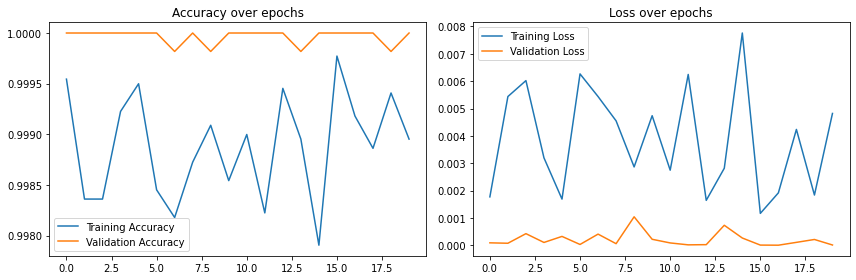

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.tight_layout()
plt.show()


In [34]:
# Classification Report
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)


225/225 [==============================] - 1s 3ms/step


In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_classes, target_names=list(label_to_letter.values()))
print(report)


              precision    recall  f1-score   support

           A       0.94      1.00      0.97       331
           B       1.00      0.95      0.98       432
           C       0.89      1.00      0.94       310
           D       0.99      1.00      0.99       245
           E       0.96      1.00      0.98       498
           F       1.00      1.00      1.00       247
           G       0.94      0.95      0.95       348
           H       0.99      0.95      0.97       436
           I       0.86      0.99      0.92       288
           K       0.94      0.93      0.94       331
           L       0.89      1.00      0.94       209
           M       0.95      0.96      0.95       394
           N       0.98      0.83      0.90       291
           O       0.94      0.83      0.88       246
           P       0.99      0.99      0.99       347
           Q       0.99      1.00      1.00       164
           R       0.75      0.83      0.79       144
           S       0.91    

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

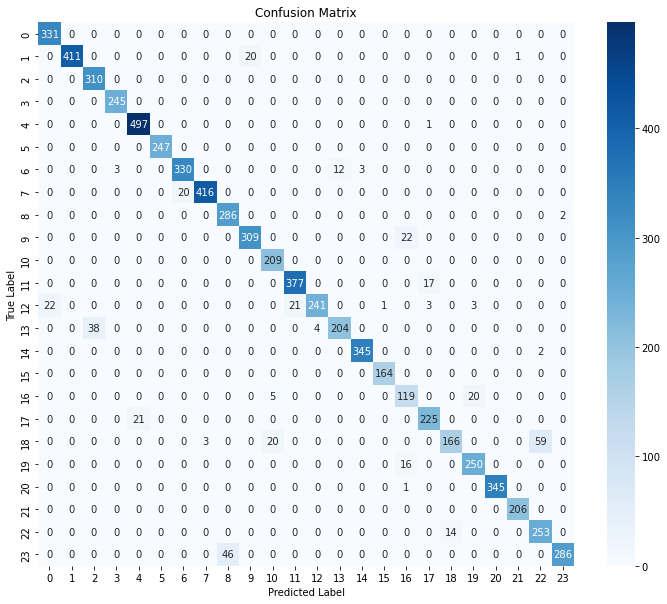

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()